# Optimal Skills for Data Analysts

Methodology

1. Group skills to determine median salary and likelihood of being in postings
2. Visualise median salary vs. percentage skill demand

Original Exploration

[15_Matplotlib_Scatter_Plots.ipynb](2_Advanced\15_Matplotlib_Scatter_Plots.ipynb)

[16_Matplotlib_Advanced_Customisation.ipynb](2_Advanced\16_Matplotlib_Advanced_Customisation.ipynb)

## Import Libraries & Data

In [1]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 
    
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

In [3]:
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [17]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills').agg(skill_count = ('salary_year_avg', 'count'), median_per_skill = ('salary_year_avg', 'median')).sort_values('skill_count', ascending = False)

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percentage'] = (df_DA_skills['skill_count'] * 100 / DA_job_count).round(0)

skill_perc = 5

df_DA_skills_hd = df_DA_skills[df_DA_skills['skill_percentage'] > skill_perc]

df_DA_skills_hd

,skill_count,median_per_skill,skill_percentage
job_skills,,,
sql,2508,91000.00,58.0
excel,1808,84392.00,42.0
python,1431,97500.00,33.0
tableau,1364,92875.00,31.0
sas,926,90000.00,21.0
r,893,92500.00,21.0
power bi,838,90000.00,19.0
powerpoint,462,85000.00,11.0
word,461,81194.75,11.0


In [18]:
from adjustText import adjust_text

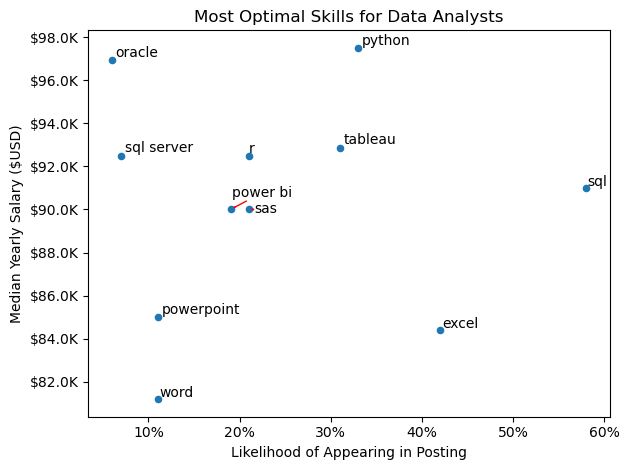

In [24]:
df_DA_skills_hd.plot(kind = 'scatter', x = 'skill_percentage', y = 'median_per_skill')

# plots labels for dots on scatter plot
texts = []
for i, txt in enumerate(df_DA_skills_hd.index):
    texts.append(plt.text(df_DA_skills_hd['skill_percentage'].iloc[i], df_DA_skills_hd['median_per_skill'].iloc[i], txt))
adjust_text(texts, arrowprops = dict(arrowstyle = "->", color = 'r', lw = 1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${y/1000}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{round(x)}%'))

plt.title('Most Optimal Skills for Data Analysts')
plt.xlabel('Likelihood of Appearing in Posting')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()

plt.show()